# Importing

## Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math

## Importing own code

In [2]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *
from prepareDatabaseForMachineLearning import*

# Generating data

If you want to use multiprocessing to speed up the procces you should run runDatabaseGeneration.py instead of this notebook. This notebook is more for playing with the data then actualy generating it.

## Generating data

In [3]:
numberOfDatapoints = 50
numberOfSurroundingCells = 4
numberOfParticlesPerCell = 4
potentialEnergyFunction = potentialEnergyPerTrio# Set the potential energy function of the data base as a function
widthOfCell = [1.0, 1.0]# The width of a singe cell.
filename = 'test2'# Name of the file in which the data will be stored, set to a boolean if you don't want to store the data.

In [4]:
data = makeRandomDatabase(numberOfDatapoints, numberOfSurroundingCells, numberOfParticlesPerCell, potentialEnergyFunction, widthOfCell, filename)

Predicted amount of calculations: 10304200 for 50 datapoints.
Assuming 19 us per calculation, estimated time needed: 196 seconds
  2 % done, expected time left 192 seconds, 3 seconds since start.
  4 % done, expected time left 188 seconds, 6 seconds since start.
  6 % done, expected time left 185 seconds, 9 seconds since start.
  8 % done, expected time left 181 seconds, 12 seconds since start.
 10 % done, expected time left 177 seconds, 14 seconds since start.
 12 % done, expected time left 173 seconds, 17 seconds since start.
 14 % done, expected time left 169 seconds, 20 seconds since start.
 16 % done, expected time left 165 seconds, 23 seconds since start.
 18 % done, expected time left 161 seconds, 26 seconds since start.
 20 % done, expected time left 157 seconds, 28 seconds since start.
 22 % done, expected time left 153 seconds, 31 seconds since start.
 24 % done, expected time left 149 seconds, 34 seconds since start.
 26 % done, expected time left 145 seconds, 37 seconds sin

## Inspecting file

If no file is saved this part is supposed to crash so don't worry.

In [5]:
dataRead = pd.read_json(filename + '.json', orient='columns')
dataRead['particleCoordinates'] = dataRead['particleCoordinates'].apply(np.array)

dataRead.head()

"""
data = dataRead
#"""

'\ndata = dataRead\n#'

## Merging files

In [6]:
toMerge = ['test1', 'test2']#['database1_50k', 'database2_20k', 'database3_20k', 'database4_20k', 'database5_20k', 'database6_20k', 'database7_20k', 'database8_20k', 'database9_20k', 'database10_20k']# File names of the things to merge.
outputFilename = 'testCombined'#'combinedData'

dataFrames = []
for name in toMerge:
    imported = pd.read_json(name + '.json', orient='columns')
    #imported['particleCoordinates'] = imported['particleCoordinates'].apply(np.array)
    dataFrames.append(imported)

total = pd.concat(dataFrames, ignore_index = True, sort = False)
total.to_json(outputFilename + '.json', orient='columns')

## Inspecting data

In [7]:
data.head()

,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy
0,"[[0.2539732131097986, 0.5133569301217047], [0....",1.0,4,1.708347e+04
1,"[[0.3076825167085496, 0.3828536467390371], [0....",1.0,4,8.116636e+03
2,"[[0.37121064485926303, 0.0018240147663489692],...",1.0,4,4.004679e+04
3,"[[0.9590294121817045, 0.3035610570878745], [0....",1.0,4,1.946797e+07
4,"[[0.22228399905550633, 0.03817433877600407], [...",1.0,4,2.640880e+03


In [8]:
data.describe()

,widthOfCell,numberOfSurroundingCells,potentialEnergy
count,50.0,50.0,5.000000e+01
mean,1.0,4.0,8.033833e+08
std,0.0,0.0,4.053233e+09
min,1.0,4.0,3.395523e+02
25%,1.0,4.0,7.770641e+03
50%,1.0,4.0,1.000159e+05
75%,1.0,4.0,4.969515e+05
max,1.0,4.0,2.443725e+10


Plotting datapoint  0  with energy  17083.47260803642


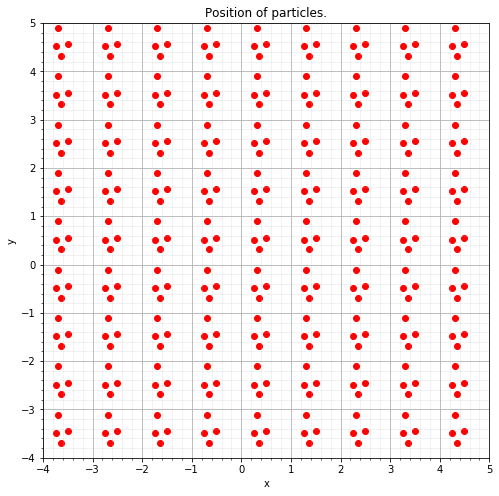

Plotting datapoint  1  with energy  8116.636454077846


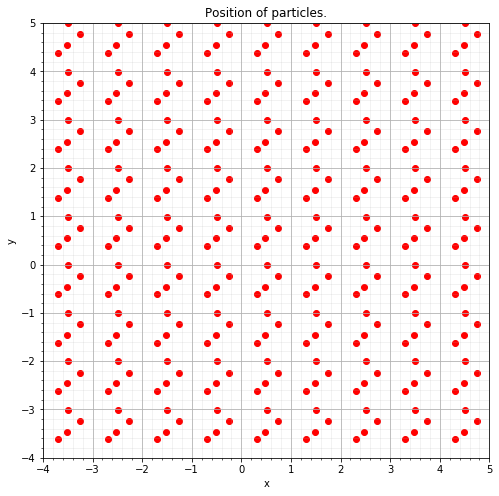

Plotting datapoint  2  with energy  40046.785520420366


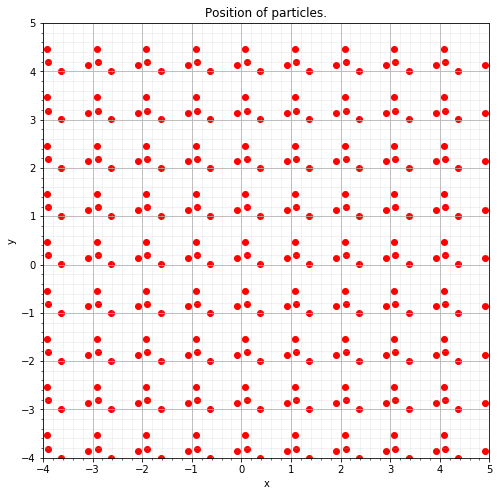

Plotting datapoint  3  with energy  19467974.957090415


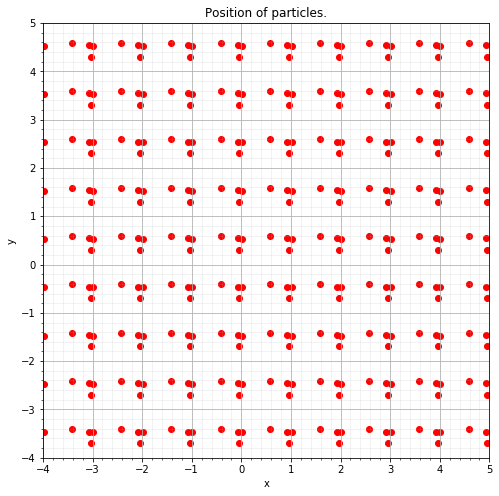

Plotting datapoint  4  with energy  2640.8795618130807


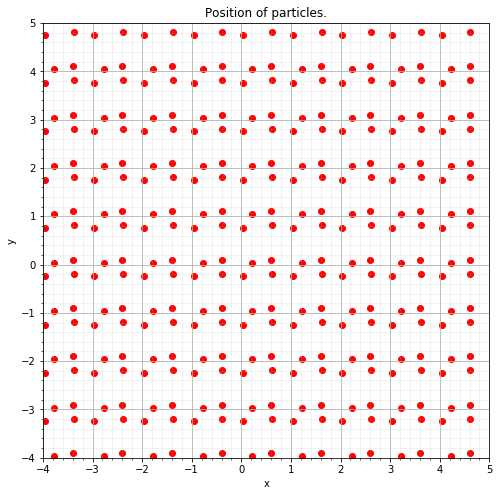

Plotting datapoint  5  with energy  339.5522678285861


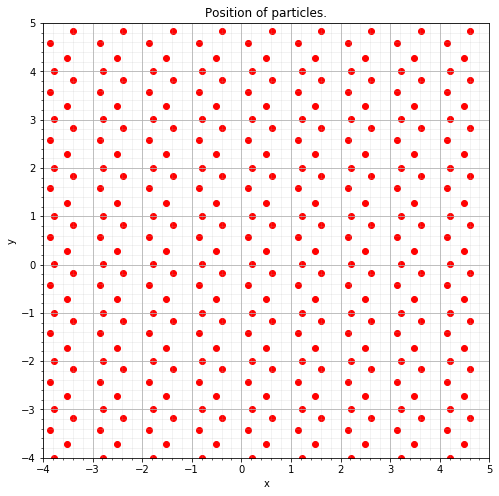

Plotting datapoint  6  with energy  7655.309290012726


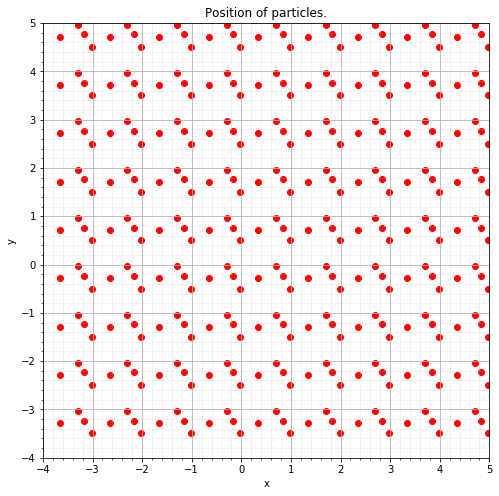

Plotting datapoint  7  with energy  146472.2203965832


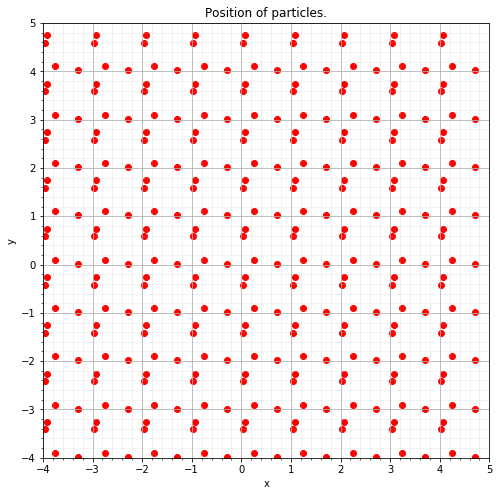

Plotting datapoint  8  with energy  111347.1097983673


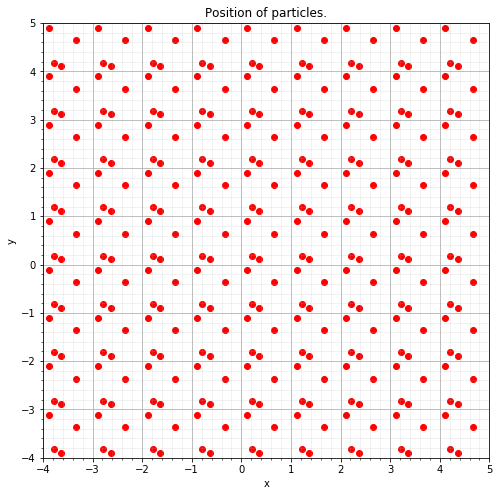

Plotting datapoint  9  with energy  282058.4413924284


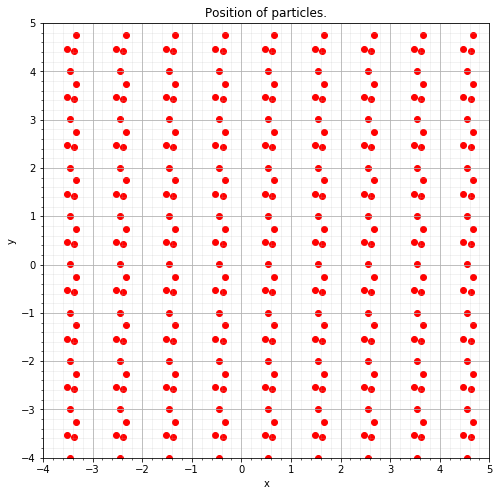

In [9]:
amountToPlot = min([10, numberOfDatapoints])

for i in range(0, amountToPlot):
    print('Plotting datapoint ', i, ' with energy ', data['potentialEnergy'][i])
    plotLatticeFromDataFrame(data, i)

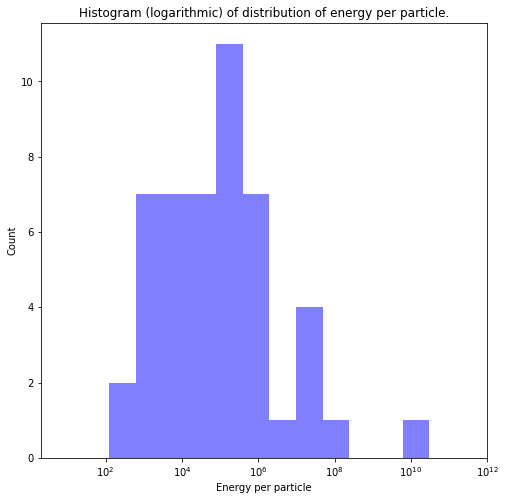

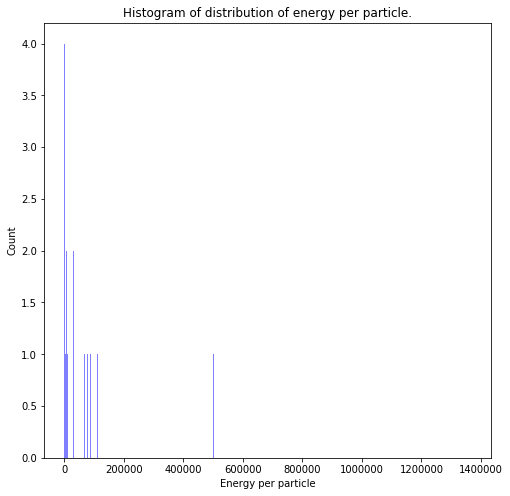

In [10]:
qLow = data['potentialEnergy'].quantile(0)
qHi  = data['potentialEnergy'].quantile(0.99)
dataFiltered = data[(data['potentialEnergy'] < qHi) & (data['potentialEnergy'] > qLow)]
x = dataFiltered['potentialEnergy']
bins = [5**i for i in range(-50, 51)]

fig, ax = plt.subplots(figsize=(8, 8))
n, bins, patches = ax.hist(x, bins = bins, facecolor='blue', alpha=0.5)
ax.set_xscale('log')
ax.set_xlim(max(math.floor(math.log(min(x)) / math.log(10)), 10**-15), math.pow(10, 1 + math.ceil(math.log(max(x)) / math.log(10))))
ax.set_title('Histogram (logarithmic) of distribution of energy per particle.')
ax.set_xlabel('Energy per particle')
ax.set_ylabel('Count')
plt.show()

qLow = data['potentialEnergy'].quantile(0.05)
qHi  = data['potentialEnergy'].quantile(0.80)
dataFiltered = data[(data['potentialEnergy'] < qHi) & (data['potentialEnergy'] > qLow)]
x = dataFiltered['potentialEnergy']
numBins = 1000

fig, ax = plt.subplots(figsize=(8, 8))
n, bins, patches = ax.hist(x, numBins, facecolor='blue', alpha=0.5)
ax.set_title('Histogram of distribution of energy per particle.')
ax.set_xlabel('Energy per particle')
ax.set_ylabel('Count')
plt.show()

# Prepare database for machine learning

In [11]:
dataPrepared = prepareDatabseForMachineLearning(data, [-1, -2])

  2 % done, expected time left 1 seconds, 1 seconds since start.
  4 % done, expected time left 1 seconds, 1 seconds since start.
  6 % done, expected time left 1 seconds, 1 seconds since start.
  8 % done, expected time left 1 seconds, 1 seconds since start.
 10 % done, expected time left 1 seconds, 1 seconds since start.
 12 % done, expected time left 1 seconds, 1 seconds since start.
 14 % done, expected time left 1 seconds, 1 seconds since start.
 16 % done, expected time left 1 seconds, 1 seconds since start.
 18 % done, expected time left 1 seconds, 1 seconds since start.
 20 % done, expected time left 1 seconds, 1 seconds since start.
 22 % done, expected time left 1 seconds, 1 seconds since start.
 24 % done, expected time left 1 seconds, 1 seconds since start.
 26 % done, expected time left 1 seconds, 1 seconds since start.
 28 % done, expected time left 1 seconds, 1 seconds since start.
 30 % done, expected time left 1 seconds, 1 seconds since start.
 32 % done, expected time

In [12]:
print(dataPrepared['eigenvalues'][0])

dataPrepared.head()

[122.05671765663473, -2.183813377701462, -4.645109479282489, -3.702351189462702, 88.27665994956403, -20.913657846847986, -3.4115623736844385, -12.960881659650038]


,index,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy,eigenvalues
0,0,"[[0.2539732131097986, 0.5133569301217047], [0....",1.0,4,1.708347e+04,"[122.05671765663473, -2.183813377701462, -4.64..."
1,1,"[[0.3076825167085496, 0.3828536467390371], [0....",1.0,4,8.116636e+03,"[120.69381616925708, -1.4948749298877801, -4.5..."
2,2,"[[0.37121064485926303, 0.0018240147663489692],...",1.0,4,4.004679e+04,"[121.40684410030673, -5.076488262065147, -2.21..."
3,3,"[[0.9590294121817045, 0.3035610570878745], [0....",1.0,4,1.946797e+07,"[125.42777669405405, -2.8598983447355915, -0.3..."
4,4,"[[0.22228399905550633, 0.03817433877600407], [...",1.0,4,2.640880e+03,"[119.93477018767388, -3.8707576911368733, -2.6..."
